In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra
import pandas as pd
import math
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


[[0 0 5 5 3 3]
 [0 3 3 1 1 0]]


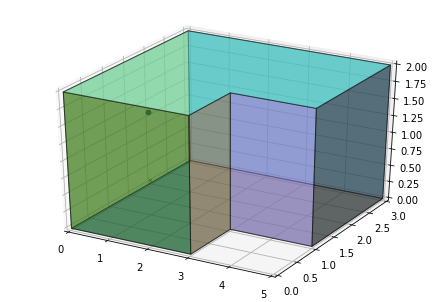

In [2]:
# Create a 3D room

# specify corners
c1 = [0,0]
c2 = [0,3]
c3 = [5,3]
c4 = [5,1]
c5 = [3,1]
c6 = [3,0]
corners = np.array([c1, c2, c3, c4, c5, c6]).T  # [x,y]
print(corners)

# specify source
fs, signal = wavfile.read("arctic_a0010.wav")

# create room 
room = pra.Room.from_corners(corners, max_order=8, absorption=0.2)
#room = pra.Room.from_corners(corners, fs=fs, max_order=8, absorption=0.2)

# lift room up by fixed height
room.extrude(2.)

# add source
room.add_source([1, 1, 1.5], signal=signal)

# add mic
R = np.array([[1], [1], [0.5]])  # [[x], [y], [z]]
room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

# display room
fig, ax = room.plot()
ax.set_xlim([0, 5])
ax.set_ylim([0, 3])
ax.set_zlim([0, 2]);



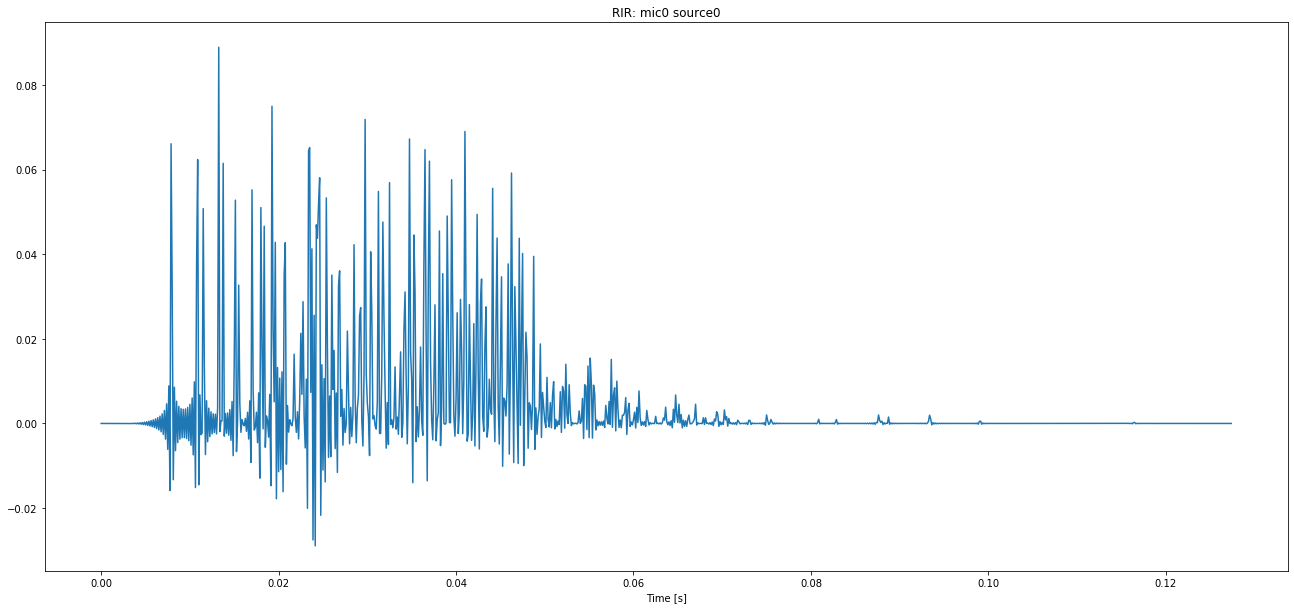

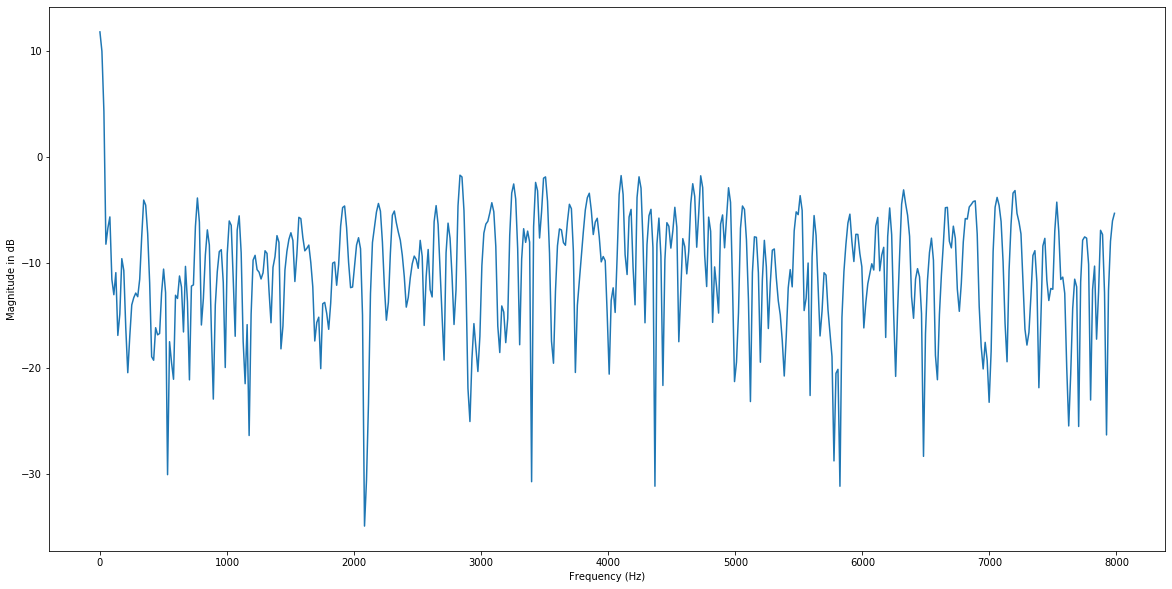

In [3]:
# compute image sources
room.image_source_model(use_libroom=True)

# save and plot room impulse response
room.plot_rir()
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

def dB(signal, power=False):
    if power is True:
        return 10*np.log10(np.abs(signal))
    else:
        return 20*np.log10(np.abs(signal))
    
# Saving IR
r = room.rir[0][0]

# Computing and plotting freq response
axis = -1

S = np.fft.rfft(r, axis=axis)
f = np.arange(S.shape[axis])/float(2*S.shape[axis])
P = dB(S)

plt.plot(f*fs, P)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude in dB')
fig = plt.gcf()
fig.set_size_inches(20, 10)


In [4]:
%matplotlib inline

In [5]:
# function to create a room given corners and calculate room impulse response in time & freq domain
def char_room (room_type, size, alpha, h, fs, signal):
    
    # default source and mic locations 
    x = 2
    y = 2
    z = 5
    
    z2 = 5
    # x2 and y2 specified later, z2 changed for auditoriums
    
    # Define cases for each room type
    
    
    if (room_type == 1):
        
        l = 15 + (size - 1)*3
        b = (l/3)*2
        c1 = [0, 0]
        c2 = [b, 0]
        c3 = [b, l]
        c4 = [0, l]
        corners = np.array([c1, c2, c3, c4]).T  
        SA = 2* (l*b + b*h + l*h)
        vol = l*b*h
        x2 = b/2
        y2 = l/2   
    
    elif (room_type == 2):
        
        l = 15 + (size - 1)*3
        b = (l/3)*2
        c1 = [0, 0]
        c2 = [b, 0]
        c3 = [b, l]
        c4 = [b-3, l]
        c5 = [b-3, l-3]
        c6 = [0, l-3]
        corners = np.array([c1, c2, c3, c4, c5, c6]).T  
        SA = b*h + l*h + 6*h + h* (b-3 + l-3) + (l-3)*b + 9
        vol = ((l-3)*b + 9)*h
        x2 = b/2
        y2 = l/2     
        
    elif (room_type == 3):
        
        l = 15 + (size - 1)*3
        b = (l/3)*2
        b2 = l/3
        c1 = [0, 0]
        c2 = [b, 0]
        c3 = [b, b2]
        c4 = [b - b2, b2]
        c5 = [b - b2, l]
        c6 = [0, l]
        corners = np.array([c1, c2, c3, c4, c5, c6]).T  
        SA = b*h + l*h + 2*b2*h + h* (b-b2 + l-b2) + b*b2 + (l-b2)*(b-b2)
        vol = h*((l-b2)*(b-b2) + b*b2)
        x2 = b/3
        y2 = l/2
        
    elif (room_type == 4):
        
        l = 12 + (size - 1)*3
        x = (l - 3)/2
        c1 = [0, 0]
        c2 = [l, 0]
        c3 = [l, l]
        c4 = [l - x, l]
        c5 = [l - x, l + 3]
        c6 = [l - x - 3, l + 3]
        c7 = [l - x - 3, l]
        c8 = [0, l]
        corners = np.array([c1, c2, c3, c4, c5, c6, c7, c8]).T 
        SA = 3*l*h + 2*x*h + 3*3*h + l*l + 9
        vol = h*(l*l + 9)
        x2 = l/2
        y2 = l/2  
        
    elif (room_type == 5):
        
        l = 15 + (size - 1)*3
        b = (l/3)*2
        b2 = l/2
        c1 = [0,0]
        c2 = [l, 0]
        c3 = [l, b]
        c4 = [l/2, b + b2]
        c5 = [0, b]
        corners = np.array([c1, c2, c3, c4, c5]).T  
        SA = 2*b*h + l*h + 2*(l/math.sqrt(2))*h + (l*b + 0.5*l*b2)
        vol = l*b*h + 0.5*l*b2*h
        x2 = l/2
        y2 = b/2  
        
    elif (room_type == 6):
        
        l = 15 + (size - 1)*3
        b = l/3
        c1 = [0,0]
        c2 = [l, 0]
        c3 = [l, b]
        c4 = [l - b, l + b]
        c5 = [b, l + b]
        c6 = [0, b]
        corners = np.array([c1, c2, c3, c4, c5, c6]).T 
        SA = 2*b*h + l*h + (l -2*b)*h + 2*(b/math.sqrt(2))*h + l*b + 0.5*b*(l + l - 2*b) 
        vol = h*(l*b + 0.5*b*(l + l - 2*b))
        x2 = l/2
        y2 = b
        
    elif (room_type == 7):
        
        l = 30
        b = l/2
        c1 = [l, 0]
        c2 = [2*l, 0]
        c3 = [2*l, b]
        c4 = [3*l, 2*b]
        c5 = [2.5*l, 3*b]
        c6 = [2*l, 4*b]
        c7 = [l, 4*b]
        c8 = [0.5*l, 3*b]
        c9 = [0, 2*b]
        c10 = [l, b]
        corners = np.array([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10]).T 
        r = 3*l/math.sqrt(2)
        SA = (math.pi*r/2)*h + 2*r*h + math.pi*r*r/4
        vol = h * math.pi*r*r/4  # approx
        x = 1.5*l
        y = 0.5*b
        z = 7
        x2 = 1.5*l
        y2 = 2*b
        z2 = 10
        
    elif (room_type == 8):
        
        l = 60
        b = l/4
        c1 = [0, 0]
        c2 = [l, 0]
        c3 = [l, l]
        c4 = [3*b, l]
        c5 = [3*b, 3*b]
        c6 = [2*b, 3*b]
        c7 = [b, 2*b]
        c8 = [b, b]
        c9 = [0, b]
        corners = np.array([c1, c2, c3, c4, c5, c6, c7, c8, c9]).T 
        SA = h*(2*l + 7*b) + l*l/2   #approx
        vol = h*l*l/2  #approx
        x = 2*b
        y = l/3
        z = 7
        x2 = 3*b
        y2 = l/3
        z2 = 10

    elif (room_type == 9):
        
        l = 20
        b1 = 10
        b2 = 15
        c1 = [b2, 0]
        c2 = [b2 + l, 0]
        c3 = [b2 + l, b1]
        c4 = [b2 + l + b2, b2 + l + b2]
        c5 = [0, b2 + l + b2]
        c6 = [b2, b1]
        corners = np.array([c1, c2, c3, c4, c5, c6]).T  
        SA = l*h + 2*b1*h + h*(b2 + l + b2) + 2*52*h + l*b1 + 0.5*(l + 2*b2 - b1)*(l + l + 2*b2)
        vol = h*(l*b1 + 0.5*(l + 2*b2 - b1)*(l + l + 2*b2))
        x = b2 + l/2
        y = b1/2
        z = 7
        x2 = b2 + l/2
        y2 = 30
        z2 = 10
        
    else:
        print("ERROR")
    
    # create room and lift it up by h
    room = pra.Room.from_corners(corners=corners, max_order=8, absorption=alpha)
    room.extrude(h)
    
    # display room
    if (size == 5 and alpha == 0.2):
        fig, ax = room.plot()
        ax.set_xlim([0, 30])
        ax.set_ylim([0, 30])
        ax.set_zlim([0, 20])
        plt.show()
    elif (room_type > 6 and alpha == 0.2):
        fig, ax = room.plot()
        ax.set_xlim([0, 150])
        ax.set_ylim([0, 100])
        ax.set_zlim([0, 30])
        plt.show()

    # add source
    room.add_source([x, y, z], signal=signal)

    # add a mic
    R = np.array([[x2], [y2], [z2]]) 
    room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

    # compute image sources and impulse response
    room.image_source_model(use_libroom=True)
    room.compute_rir()

    # save room impulse response (IR)
    IR = room.rir[0][0]

    # compute freq response (FR)
    S = np.fft.rfft(IR, axis=-1)
    FR = 20*np.log10(np.abs(S))
    if (np.isnan(np.sum(FR))):
        print("FR is Nan. STOP")

    return corners, SA, vol, IR, FR




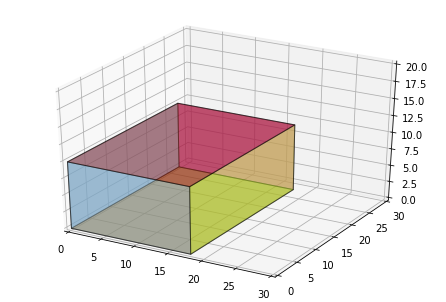

   Room type Room size Height Alpha  \
75         1         5     10   0.8   

                                             Corners    SA   Vol  \
75  [[0.0, 18.0, 18.0, 0.0], [0.0, 0.0, 27.0, 27.0]]  1872  4860   

                                                   IR  \
75  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   FR  
75  [-22.73632878526643, -23.917803959146102, -27....  
Done with room type 1  out of 9


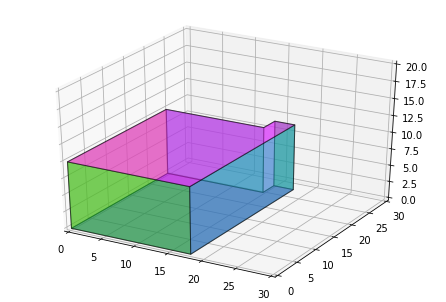

    Room type Room size Height Alpha  \
150         2         5     10   0.8   

                                               Corners    SA   Vol  \
150  [[0.0, 18.0, 18.0, 15.0, 15.0, 0.0], [0.0, 0.0...  1341  4410   

                                                    IR  \
150  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    FR  
150  [-22.660639083285616, -24.075636137009937, -28...  
Done with room type 2  out of 9


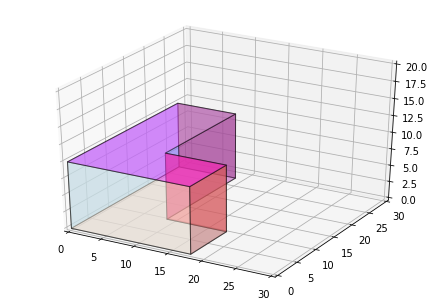

    Room type Room size Height Alpha  \
225         3         5     10   0.8   

                                               Corners    SA   Vol  \
225  [[0.0, 18.0, 18.0, 9.0, 9.0, 0.0], [0.0, 0.0, ...  1224  3240   

                                                    IR  \
225  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    FR  
225  [-22.144311838592827, -23.319149750125234, -26...  
Done with room type 3  out of 9


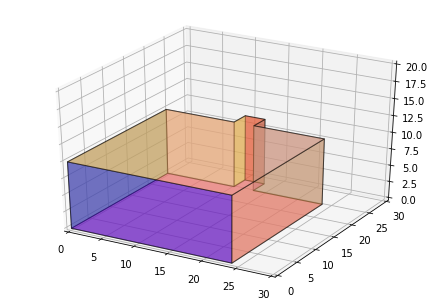

    Room type Room size Height Alpha  \
300         4         5     10   0.8   

                                               Corners    SA   Vol  \
300  [[0.0, 24.0, 24.0, 13.5, 13.5, 10.5, 10.5, 0.0...  1605  5850   

                                                    IR  \
300  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    FR  
300  [-22.197296831990883, -23.535625464755796, -27...  
Done with room type 4  out of 9


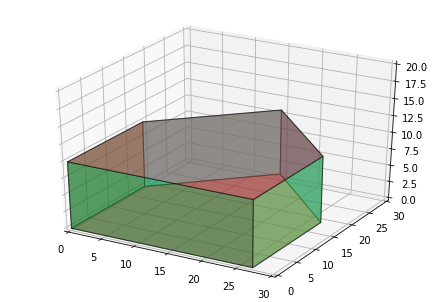

    Room type Room size Height Alpha  \
375         5         5     10   0.8   

                                               Corners       SA     Vol  \
375  [[0.0, 27.0, 27.0, 13.5, 0.0], [0.0, 0.0, 18.0...  1680.09  6682.5   

                                                    IR  \
375  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    FR  
375  [-22.936310862994553, -24.3141379736136, -28.8...  
Done with room type 5  out of 9


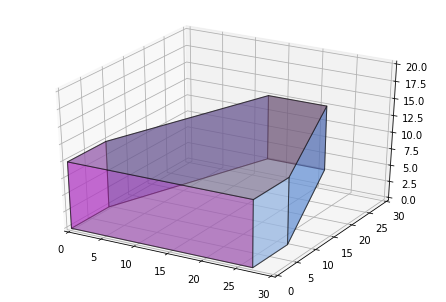

    Room type Room size Height Alpha  \
450         6         5     10   0.8   

                                               Corners       SA   Vol  \
450  [[0.0, 27.0, 27.0, 18.0, 9.0, 0.0], [0.0, 0.0,...  1072.28  4050   

                                                    IR  \
450  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    FR  
450  [-22.993751390207663, -24.28521537513772, -28....  
Done with room type 6  out of 9


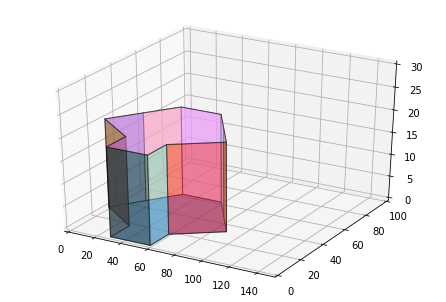

    Room type Room size Height Alpha  \
465         7         1     20   0.8   

                                               Corners       SA      Vol  \
465  [[30.0, 60.0, 60.0, 90.0, 75.0, 60.0, 30.0, 15...  7725.74  63617.3   

                                                    IR  \
465  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    FR  
465  [-29.052382664707743, -30.23661445655097, -34....  
Done with room type 7  out of 9


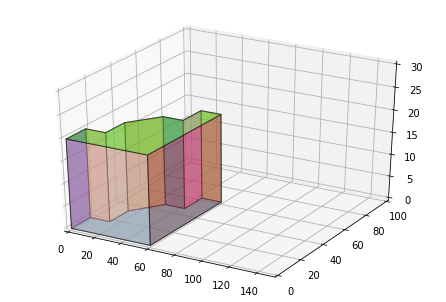

    Room type Room size Height Alpha  \
480         8         1     20   0.8   

                                               Corners    SA    Vol  \
480  [[0.0, 60.0, 60.0, 45.0, 45.0, 30.0, 15.0, 15....  6300  36000   

                                                    IR  \
480  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    FR  
480  [-27.208883751374696, -28.871254062609143, -34...  
Done with room type 8  out of 9


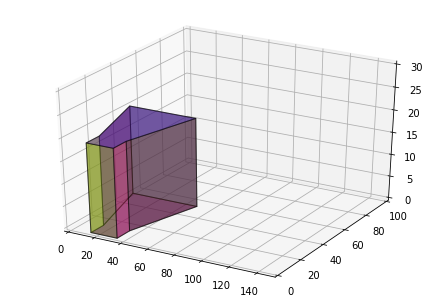

    Room type Room size Height Alpha  \
495         9         1     20   0.8   

                                               Corners    SA    Vol  \
495  [[15, 35, 35, 50, 0, 15], [0, 0, 10, 50, 50, 10]]  5480  32000   

                                                    IR  \
495  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    FR  
495  [-30.201339218225073, -31.618051048635213, -36...  
Done with room type 9  out of 9


In [6]:
# Create necessary arrays
alphas = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
ind = np.arange(1, 496, 1)
# 15 * 6 * 5 = 450
# 15 * 3 * 1 = 45
# Total 495 rooms

# Initialize dataframe
cols = ["Room type", "Room size", "Height", "Alpha", "Corners", "SA", "Vol", "IR", "FR"]
df = pd.DataFrame(index = ind, columns = cols)

# specify source
fs, signal = wavfile.read("arctic_a0010.wav")

room_types = 9
room_sizes = 5

ctr = 1;

for i in range (1, room_types + 1):
        
    if (i == 7):
        room_sizes = 1
    
    for j in range (1, room_sizes + 1):
        
        for a in alphas:
            
            # set room type
            df.at[ctr, 'Room type'] = i
            
            # set room size
            df.at[ctr, 'Room size'] = j
            
            # set room height
            h = 10 if i < 7 else 20
            df.at[ctr, 'Height'] = h
            
            # set alpha
            df.at[ctr, 'Alpha'] = a
            
            corners, SA, vol, IR, FR = char_room (i, j, a, h, fs, signal)
    
            # set corner
            df.at[ctr, 'Corners'] = corners
            
            # set SA
            df.at[ctr, 'SA'] = SA
            
            # set vols
            df.at[ctr, 'Vol'] = vol
            
            # set IR
            df.at[ctr, 'IR'] = IR
            
            # set FR
            df.at[ctr, 'FR'] = FR

            # increment counter
            ctr += 1
            
    print(df.loc[[ctr - 1]])
    print("Done with room type", str(i), " out of 9")
    

In [17]:
print (df.head())

  Room type Room size Height Alpha  \
1         1         1     10   0.1   
2         1         1     10  0.15   
3         1         1     10   0.2   
4         1         1     10  0.25   
5         1         1     10   0.3   

                                            Corners   SA   Vol  \
1  [[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 15.0, 15.0]]  800  1500   
2  [[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 15.0, 15.0]]  800  1500   
3  [[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 15.0, 15.0]]  800  1500   
4  [[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 15.0, 15.0]]  800  1500   
5  [[0.0, 10.0, 10.0, 0.0], [0.0, 0.0, 15.0, 15.0]]  800  1500   

                                                  IR  \
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                     

In [7]:
# helper function to compute energy in bins

def get_fr_bin_indices(FR, fs, num_bins, multiples=100):
    
    
    freq_bins = fs*np.arange(FR.shape[-1])/float(2*FR.shape[-1])
    for f in freq_bins:
        f = round(f)
    
    #find the frequency index numbers to group in bins of 10 kHz width 
    # from 0-100 Hz, 100-200 Hz, up to 8 kHz
    stop_freq_arr = np.zeros((num_bins, ))
    start_freq_arr = np.zeros((num_bins, ))
    
    for i in range(num_bins):
        
        stop_freq = multiples*(i + 1)
        stop_freq_arr[i] = freq_bins.searchsorted(stop_freq, side='right') - 1
        
        if (i < num_bins - 1):
            start_freq_arr[i + 1] = stop_freq_arr[i] + 1
        
    return start_freq_arr.astype(int), stop_freq_arr.astype(int)
    
    

In [8]:
fr_bins_even = []
fs = 16000
multiples=100
num_bins = int((fs/2)/multiples)

for i in range (0, 495):
    
    FR = df.iloc[i, 8]
    start_freq_arr, stop_freq_arr = get_fr_bin_indices(FR, fs, num_bins, 100)
    
    fr_sum = np.zeros(num_bins)
    
    for j in range (0, 80):
    
        indices = np.asarray([start_freq_arr[j], stop_freq_arr[j]])
        fr_sum[j] = np.sum(FR[indices])
               
    fr_bins_even.append(fr_sum)
     

[298 166 167]
Result # 1 is the following room, whose absorption coeff is 0.75


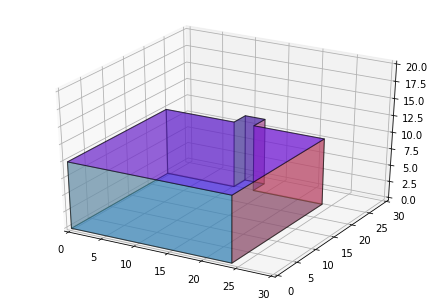

Result # 2 is the following room, whose absorption coeff is 0.15


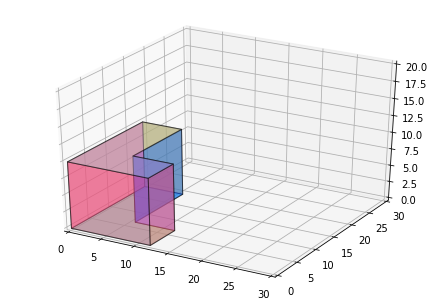

Result # 3 is the following room, whose absorption coeff is 0.2


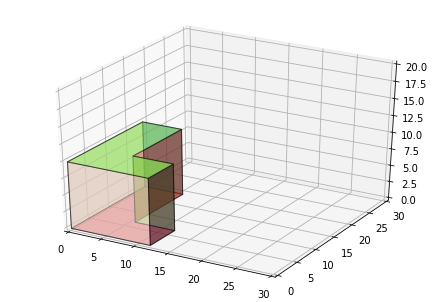

0.37446654199783286
0.3743994996289006
0.37371255042920215


In [9]:
from scipy.stats.stats import pearsonr as psn
import warnings
warnings.filterwarnings('ignore')

# Test signal with slightly different parameters but essentially a room of type i
fs, signal = wavfile.read("exercise_bike.wav")
#fs, signal = wavfile.read("arctic_a0010.wav")
corners, SA, vol, IR_test, FR_test = char_room (9, 4.8, 0.45, 15, fs, signal)

# split FR into bins
start_freq_arr, stop_freq_arr = get_fr_bin_indices(FR_test, fs, num_bins, 100)
fr_test_sum = np.zeros(num_bins)
    
for j in range (0, 80):
    
    indices = np.asarray([start_freq_arr[j], stop_freq_arr[j]])
    fr_test_sum[j] = np.sum(FR_test[indices])

corrs = np.zeros(495)
for i in range(495):
    corrs[i], _ = psn(fr_test_sum, fr_bins_even[i])
    
# Get top 3 correlated rooms
ind = np.argpartition(corrs, -3)[-3:]
ind = np.flip(ind[np.argsort(corrs[ind])])
print(ind)

# Get details of those three rooms

c = 1
# Recreate and display the rooms
for i in ind:
    room = pra.Room.from_corners(corners=df.iloc[i, 4], max_order=8, absorption=df.iloc[i, 3])
    
    print ("Result #", str(c), "is the following room, whose absorption coeff is", str(df.iloc[i, 3]))
    
    # display room
    if (i < 450):  
        room.extrude(10)
        fig, ax = room.plot()
        ax.set_xlim([0, 30])
        ax.set_ylim([0, 30])
        ax.set_zlim([0, 20])
       
    else:
        room.extrude(20)
        fig, ax = room.plot()
        ax.set_xlim([0, 150])
        ax.set_ylim([0, 100])
        ax.set_zlim([0, 30])
       
    plt.show()
    
    c += 1

print (corrs[ind[0]])
print (corrs[ind[1]])
print (corrs[ind[2]])  

    
    

In [69]:
import scipy.stats as stats
from scipy import signal


def T60(decayCurveNorm, fs=16000):
    """Calculate T60

    :param decayCurveNorm: is the normalized decay curve
    :param fs: sample rate
    :return: T60
    """

    T, nonLin = _reverberation(decayCurveNorm, -5, -65, fs)
    T60 = T
    return T60, nonLin


def C50(IR, fs=16000):
    """Calculate clarity for speech (C50)

    :param IR: impulse response
    :param fs: sample rate
    :return: C50
    """

    C50 = _clarity(IR, 50, fs)
    return C50


def C80(IR, fs=16000):
    """Calculate clarity for music (C80)

    :param IR: impulse response
    :param fs: sample rate
    :return: C80
    """

    C80 = _clarity(IR, 80, fs)
    return C80


#### HELP FUNCTIONS ####

def get_estimate (alpha, SA, vol):
    
    return (0.161*vol)/(alpha*SA)


def decayCurve(sig, estimate, fs=16000, noiseEnd=0):
    """Calculate the decay curve from a noise signal

    :param sig: noise signal
    :param estimate: the estimated reverb time (s)
    :param fs: sample rate
    :param noiseEnd: the time at which the noise stimuli stops
    :return:
    """

    decayCurvePa = exponential(sig, estimate / 40, fs)
    decayCurveSPL = 20 * np.log10(abs(decayCurvePa))
    decayCurveNorm = decayCurveSPL - np.max(decayCurveSPL[int(noiseEnd * fs):], axis=0)
    return decayCurveNorm


def exponential(S, tau, fs):
    T = 1 / fs
    b = np.array([T / (T + tau)])
    b2 = np.array([1, -tau / (T + tau)])

    y = signal.lfilter(b, b2, S ** 2, axis=0)
    Ptau = np.sqrt(y)
    return Ptau


def _reverberation(decayCurveNorm, reqDBStart=-5, reqDBEnd=-60, fs=16000):
    """Calculate reverberation based on requirements for start and stop level

    :param decayCurveNorm: normalized decay curve
    :param reqDBStart: start level for reverberation (is -5 for T60 and 0 for EDT)
    :param reqDBEnd: end level for reverberation (is -60 for T60)
    :param fs: sample rate
    :return: reveration
    """

    if decayCurveNorm.ndim == 1:
        decayCurveNorm = decayCurveNorm[:, np.newaxis]

    # create return arrays based on number of decay curves
    T = np.zeros((np.size(decayCurveNorm, axis=1), 1))
    nonLinearity = np.zeros((np.size(decayCurveNorm, axis=1), 1))

    for i in range(np.size(decayCurveNorm, axis=1)):
        try:
            sample0dB = np.where(decayCurveNorm[:, i] < reqDBStart)[0][0]  # find first sample below 0 dB
        except IndexError:
            raise ValueError("The is no level below {} dB".format(reqDBStart))

        try:
            sample10dB = sample0dB + np.where(decayCurveNorm[:, i][sample0dB:] <= reqDBEnd)[0][0]  # find first sample below -10dB
        except IndexError:
            raise ValueError("The is no level below required {} dB".format(reqDBEnd))

        testDecay = decayCurveNorm[:, i][sample0dB:sample10dB]  # slice decaycurve to specific samples

        slope, intercept, r_value, p_value, std_err = stats.linregress(np.linspace(sample0dB / fs, sample10dB / fs, np.size(testDecay, axis=0)), testDecay)  # calculate the slope and of signal nonlinearity
        nonLinearity[i] = np.round(1000 * (1 - r_value ** 2), 1)  # calculate the nonlinearity
        x = np.arange(-5, len(decayCurveNorm[:, i]) / fs + 5, 1 / 1000)  # create straight line with 1 ms resolution +- 5 secons
        y = intercept + slope * x  # generate line with slop of calculated slope

        T[i] = len(y[np.where(y <= reqDBStart)[0][0]:np.where(y <= reqDBEnd)[0][0]]) / 1000  # calculate reverberation with 1 ms resolution from generated linear line
    return T, nonLinearity


def _clarity(IR, t=50, fs=16000):
    """Calculate the clarity from impulse response

    :param IR: impulse response
    :param t: is the defined shift from early to late reflections (is often 50 ms or 80 ms)(ms)
    :param fs: sample rate
    :return: clarity
    """

    C = 10 * np.log10(np.sum(IR[0:np.int64((t / 1000) * fs)] ** 2, axis=0) / np.sum(IR[np.int64((t / 1000) * fs):] ** 2, axis=0))
    if C.ndim == 1:
        C = C[:, np.newaxis]
    return C


def _definition(IR, t=50, fs=16000):
    """Calculate the defintion from impulse response

    :param IR: impulse response
    :param t: is the defined shift from early to late reflections (is often 50 ms)(ms)
    :param fs: sample rate
    :return: definition
    """

    D = np.sum(IR[0:np.int64(t / 1000 * fs)] ** 2, axis=0) / np.sum(IR ** 2, axis=0)
    if D.ndim == 1:
        D = D[:, np.newaxis]
    return D


In [71]:
i = 460
r = df.iloc[i, 7]
r_est = get_estimate (df.iloc[i, 3], df.iloc[i, 5], df.iloc[i, 6])
dec_curve = decayCurve(r, r_est, fs=16000, noiseEnd=0)
T60 = T60(dec_curve, fs=16000)
C50 = C50(IR, fs=16000)
C80 = C80(IR, fs=16000)

ValueError: Inputs must not be empty.

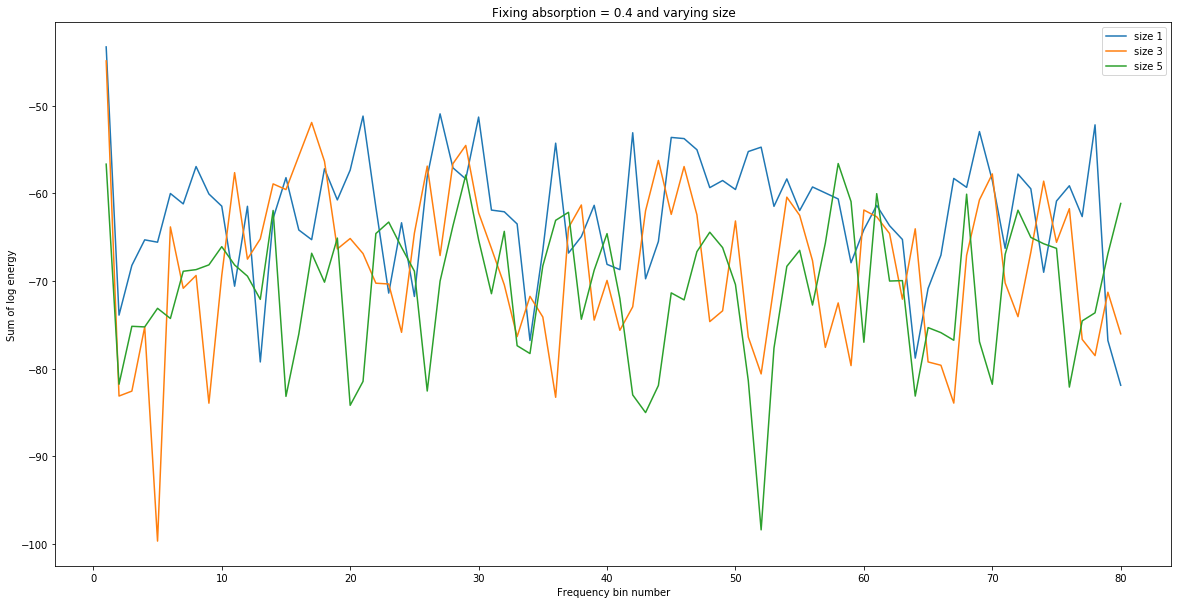

In [12]:
fr_bins_axis = np.arange(1, 81)
 
#fixed alpha = 0.4, size = 1 and 5
plt.plot(fr_bins_axis, fr_bins_even[6], label = 'size 1')
#plt.plot(fr_bins_axis, fr_bins_even[15])
plt.plot(fr_bins_axis, fr_bins_even[36], label = 'size 3')
#plt.plot(fr_bins_axis, fr_bins_even[45])
plt.plot(fr_bins_axis, fr_bins_even[66], label = 'size 5') 
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Fixing absorption = 0.4 and varying size')
plt.xlabel('Frequency bin number')
plt.ylabel('Sum of log energy')
plt.legend(loc="upper right")
plt.show()




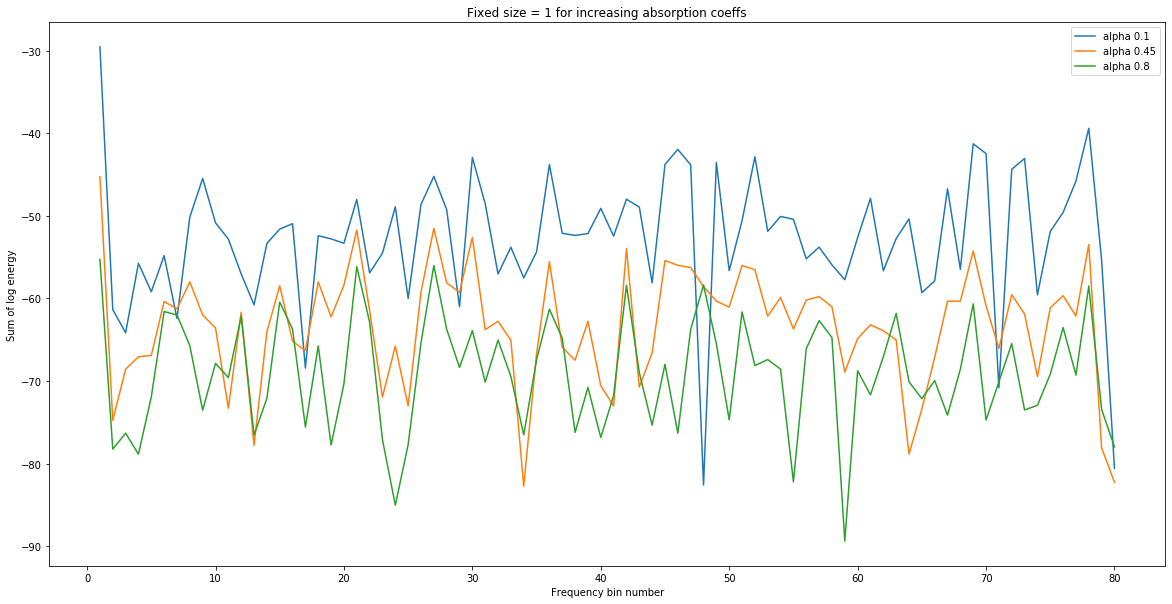

In [13]:
# fixed size, alpha 0.1, 0.45, 0.8
plt.plot(fr_bins_axis, fr_bins_even[0], label = 'alpha 0.1')
plt.plot(fr_bins_axis, fr_bins_even[7], label = 'alpha 0.45')
plt.plot(fr_bins_axis, fr_bins_even[14], label = 'alpha 0.8')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Fixed size = 1 for increasing absorption coeffs')
plt.xlabel('Frequency bin number')
plt.ylabel('Sum of log energy')
plt.legend(loc="upper right")
plt.show()